In [ ]:
#Implementacja algorytmu Logistic regression
import numpy as np


def Sigmoidfunction(x):
  return 1/(1+np.exp(-x))


class LogisticRegression():

  def __init__(self,learning_rate=0.001, number_of_iterations = 1000):
    self.learning_rate = learning_rate
    self.number_of_iterations = number_of_iterations
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    number_of_samples, number_of_features = X.shape
    self.weights = np.zeros(number_of_features)
    self.bias = 0

    for i in range(self.number_of_iterations):
      linear_predictions = np.dot(X, self.weights) + self.bias
      y_predictions = Sigmoidfunction(linear_predictions)

      dw =(1/number_of_samples)* np.dot(X.transpose(),(y_predictions - y))
      db = (1/number_of_samples)* np.sum(y_predictions - y)
      self.weights = self.weights - self.learning_rate * dw
      self.bias = self.bias - self.learning_rate * db


  def predict(self, X):
    linear_predictions = np.dot(X, self.weights) + self.bias
    y_predicted = Sigmoidfunction(linear_predictions)
    final_predictions = [0 if y<= 0.5 else 1 for y in y_predicted]
    return final_predictions




In [ ]:
#funkcja sprawdzająca jaka część przewidywanych wartości pokrywa się z danymi testowymi
def accuracy(y_pred, y_test):
  a = np.sum(y_pred == y_test)/len(y_test)
  print("Dokladnosc klasyfikatora wynosi: ", a)


In [ ]:
#Implementacja treningu modelu
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

data = datasets.load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 1234)

classifier = LogisticRegression(learning_rate=0.0001)
classifier.fit(X_train, y_train)
results = classifier.predict(X_test)

a = accuracy(results, y_test)



Dokladnosc klasyfikatora wynosi:  0.9298245614035088


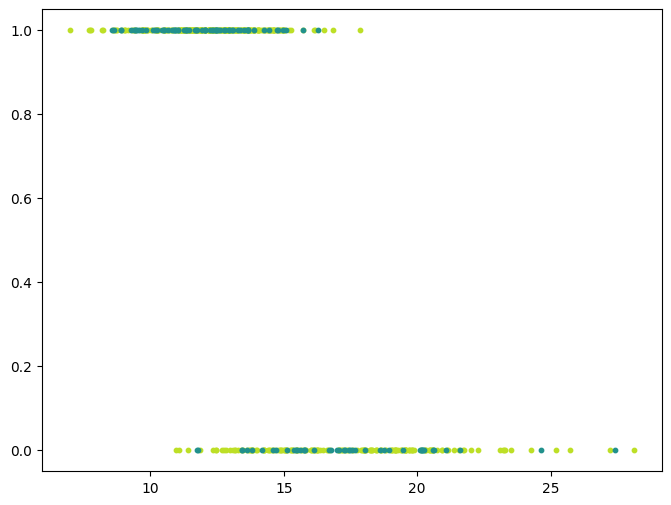

In [ ]:
#Wyswietlanie wykresu
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize = (8,6))
#plt.scatter(X[:,0],y,color='black', marker = 'o', s=30)
m1 = plt.scatter(X_train[:,0], y_train, color = cmap(0.9), s=10)
m2 = plt.scatter(X_test[:,0], y_test, color=cmap(0.5), s=10)
plt.show()